# Exercise with Capital Bikeshare data

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [56]:
# read the data and set "datetime" as the index
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [57]:
# "count" is a method, so it's best to rename that column to "total"
bikes = bikes.rename(columns={'count':'total'})

In [58]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1


In [59]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour

- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

## Task 1

Run these two `groupby` statements and figure out what they tell you about the data.

In [60]:
#data.groupby(func, axis=0).mean()
#data.groupby(['col1', 'col2'])['col3'].mean()
#data.groupby(['col1', 'col2']).mean()

In [74]:
# Create a groupby statement and calculate the mean number of rentals on and off a workday
bikes.groupby(['workingday'])['total'].mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [75]:
#df1['e'] = Series(np.random.randn(sLength), index=df1.index)
bikes.groupby(['hour'])['total'].mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

## Task 2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

In [82]:
df_holiday = bikes[bikes['workingday']!=1]
df_working = bikes[bikes['workingday']!=0]

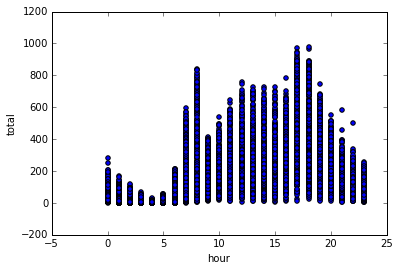

In [83]:
#plot the mean rentals by hour of day
bikes.plot(kind='scatter',x='hour',y='total')

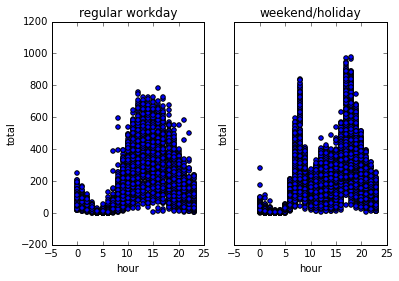

In [91]:
fig, axs = plt.subplots(1, 2, sharey=True)
#plot the mean hourly rental where workingday = 0
df_holiday.plot(kind='scatter',x='hour',y='total',title='regular workday', ax=axs[0])
# plot hourly rentals where working group = 1
df_working.plot(kind='scatter',x='hour',y='total',title='weekend/holiday', ax=axs[1])

In [95]:
df_working.total

datetime
2011-01-03 00:00:00      5
2011-01-03 01:00:00      2
2011-01-03 04:00:00      1
2011-01-03 05:00:00      3
2011-01-03 06:00:00     30
2011-01-03 07:00:00     64
2011-01-03 08:00:00    154
2011-01-03 09:00:00     88
2011-01-03 10:00:00     44
2011-01-03 11:00:00     51
2011-01-03 12:00:00     61
2011-01-03 13:00:00     61
2011-01-03 14:00:00     77
2011-01-03 15:00:00     72
2011-01-03 16:00:00     76
2011-01-03 17:00:00    157
2011-01-03 18:00:00    157
2011-01-03 19:00:00    110
2011-01-03 20:00:00     52
2011-01-03 21:00:00     52
2011-01-03 22:00:00     20
2011-01-03 23:00:00     12
2011-01-04 00:00:00      5
2011-01-04 01:00:00      2
2011-01-04 02:00:00      1
2011-01-04 04:00:00      2
2011-01-04 05:00:00      4
2011-01-04 06:00:00     36
2011-01-04 07:00:00     94
2011-01-04 08:00:00    179
                      ... 
2012-12-18 18:00:00    525
2012-12-18 19:00:00    353
2012-12-18 20:00:00    268
2012-12-18 21:00:00    168
2012-12-18 22:00:00    132
2012-12-18 23:00:00

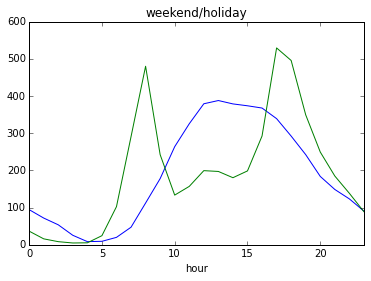

In [97]:
#plot the mean hourly rental where workingday = 0
df_holiday.groupby('hour').total.mean().plot(x='hour',y='total',title='regular workday')
# plot hourly rentals where working group = 1
df_working.groupby('hour').total.mean().plot(x='hour',y='total',title='weekend/holiday')

## Task 3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. 

In [100]:
# create X and y
X = bikes[['hour', 'workingday']]
y = bikes['total']

In [101]:
# fit a linear regression model and print coefficients
lr = LinearRegression()

In [102]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
coef_1, coef_2 = lr.coef_
print coef_1, coef_2

10.4920628229 4.0724862729


## Task 4

Use 10-fold cross-validation to calculate the RMSE for the linear regression model.

In [107]:
# save the 10 MSE scores output by cross_val_score
# Compute RMSE on training data
# p = np.array([linreg.predict(xi) for xi in x])
p = lr.predict(X)
# Now we can constuct a vector of errors
err = abs(p-y)

# Let's see the error on the first 10 predictions
print err[:10]

datetime
2011-01-01 00:00:00     51.705950
2011-01-01 01:00:00     38.198013
2011-01-01 02:00:00     56.690076
2011-01-01 03:00:00     86.182139
2011-01-01 04:00:00    108.674202
2011-01-01 05:00:00    119.166264
2011-01-01 06:00:00    128.658327
2011-01-01 07:00:00    138.150390
2011-01-01 08:00:00    143.642453
2011-01-01 09:00:00    148.134516
Name: total, dtype: float64


In [108]:
total_error = np.dot(err,err)

rmse_train = np.sqrt(total_error/len(p))
print rmse_train

165.955582167


In [110]:
print 'Regression Coefficients: \n', lr.coef_

Regression Coefficients: 
[ 10.49206282   4.07248627]


In [ ]:
# convert MSE to RMSE, and then calculate the mean of the 10 RMSE scores


## Task 5

Use 10-fold cross-validation to evaluate a decision tree model with those same features (fit to any "max_depth" you choose).

In [ ]:
# evaluate a decision tree model with "max_depth=7" and calculate the RMSE
